# UNGRADED Workbook for In-Class

This notebook is here for you to "code along" during class. 

It will not be graded, so feel free to play around!

In [1]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-b402ti0l because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import PIL.Image as Image

In [4]:
im = Image.open("stitch_reworked.png")

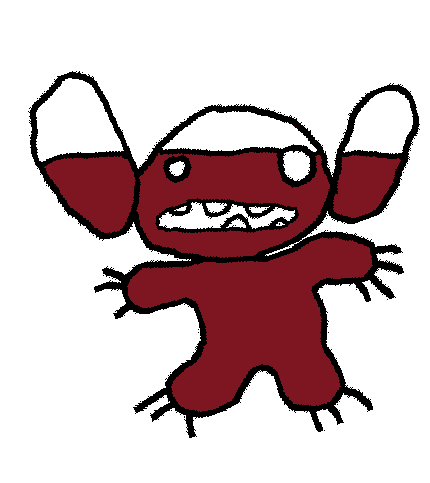

In [5]:
im

In [6]:
a = 1

In [7]:
print(a)

1


In [8]:
b = "Hello there"

In [9]:
b

'Hello there'

In [10]:
print(b)

Hello there


In [11]:
im_data = np.array(im)

In [12]:
im_data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [13]:
im_data.shape

(483, 430, 4)

In [14]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [15]:
channel_labels = ["R", "G", "B", "A"]
for i in range(im_data.shape[2]):
    print('channel=', channel_labels[i],
         'unique values=', np.unique(im_data[:,:,i]))

channel= R unique values= [  0 126 255]
channel= G unique values= [  0  22 255]
channel= B unique values= [  0  33 255]
channel= A unique values= [  0 255]


In [16]:
im_data.shape

(483, 430, 4)

In [17]:
im_data[:,:,1].shape

(483, 430)

In [18]:
im_data[10:-10,::3,:3].shape

(463, 144, 3)

In [19]:
im_reshaped = im_data.reshape((-1, 4))

In [20]:
im_reshaped.shape

(207690, 4)

In [21]:
np.sum(im_reshaped, axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

In [22]:
np.sum(im_reshaped, axis=0)

array([ 8201469,  3942773,  4393212, 18509685], dtype=uint64)

In [23]:
np.unique(im_reshaped, axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [24]:
hex(126), hex(22), hex(33)

('0x7e', '0x16', '0x21')

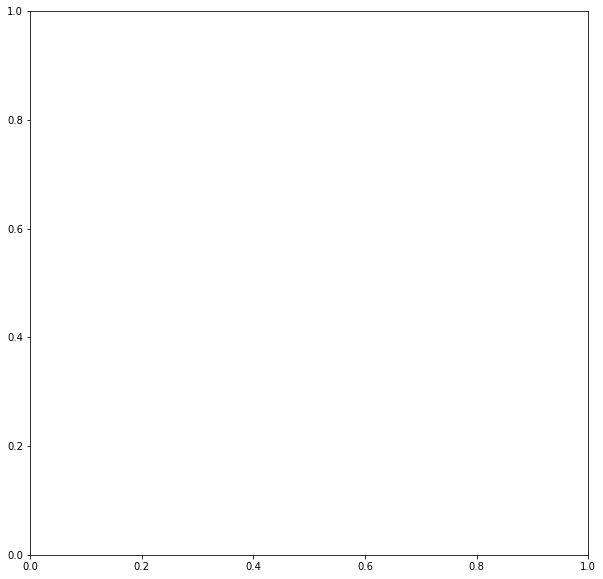

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

In [26]:
ax.imshow(im_data)

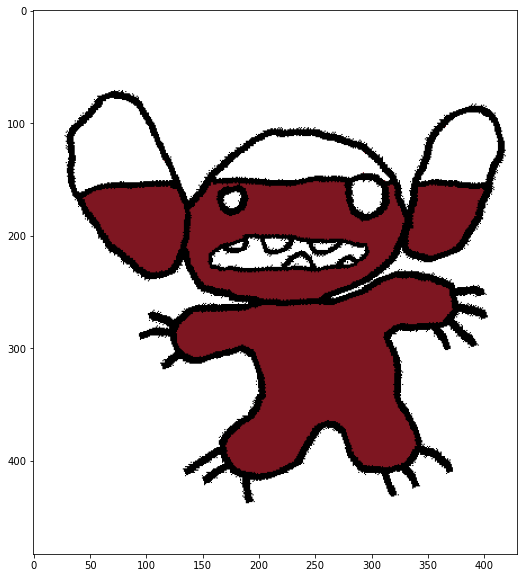

In [27]:
fig

In [28]:
ax.imshow(im_data, origin='lower')

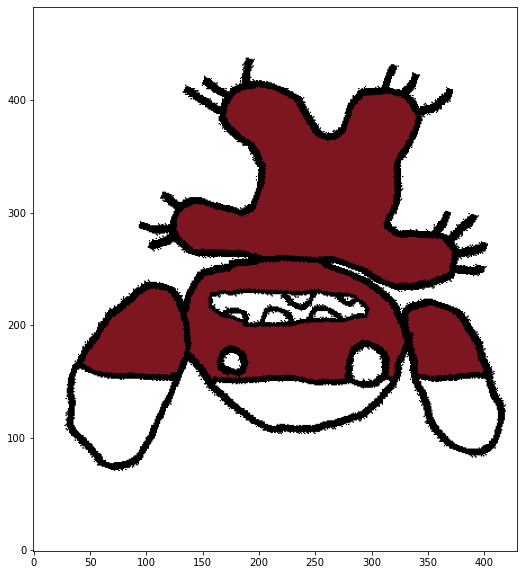

In [29]:
fig

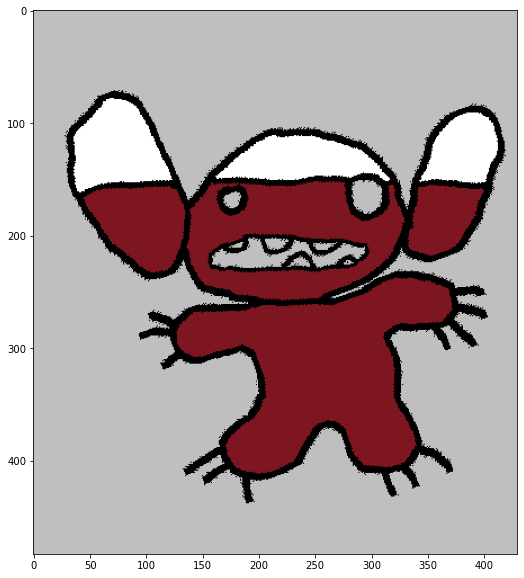

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im_data * 0 + 125)
ax.imshow(im_data)
plt.show()

In [31]:
im_data[:,:,0] == 255

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [38]:
reds_good_mask = im_data[:,:,0] == 255
greens_good_mask = im_data[:,:,1] == 255
blues_good_mask = im_data[:,:,2] == 255
alphas_good_mask = im_data[:,:,3] == 255

In [39]:
pixel_good_mask = (reds_good_mask & greens_good_mask & blues_good_mask & alphas_good_mask)

In [40]:
pixel_good_mask.sum()

11929

In [41]:
pixel_good_mask.size

207690

In [43]:
~pixel_good_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [44]:
pixel_mask_bad = ( (im_data[:,:,0] == 126)
                  & (im_data[:,:,1] == 22)
                  & (im_data[:,:,2] == 33)
                  & (im_data[:,:,3] == 255))

In [46]:
pixel_mask_bad.sum()

40949

In [48]:
ngood = pixel_good_mask.sum()
nbad = pixel_mask_bad.sum()

In [49]:
ngood / (ngood + nbad)

0.22559476530882408

In [50]:
nbad / (ngood + nbad)

0.774405234691176

In [51]:
total = ngood + nbad

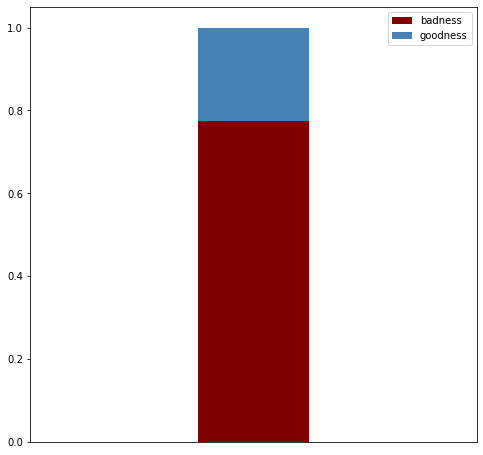

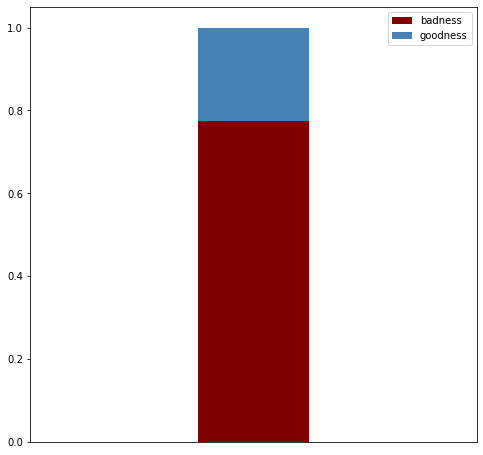

In [62]:
fig, ax = plt.subplots(figsize=(8,8))

ax.bar([1], nbad/total, [0.5], color='maroon', label = 'badness')
ax.bar([1], ngood/total, [0.5], color='steelblue', label = 'goodness', bottom = nbad / total)
ax.set_xlim(0.0, 2.0)
ax.xaxis.set_visible(False)
ax.legend()
fig

In [63]:
import csv

In [64]:
f = open("building_inventory.csv", "r")

In [66]:
f.seek(0)

0

In [67]:
f.seek(100)

100

In [68]:
f.read(10)

't,Rep Full'

In [ ]:
f.seek(0)
for record in csv.reader(f):
    print(record)

In [72]:
f.seek(0)
reader = csv.reader(f)
header = next(reader)

In [74]:
data = {}
for column in header:
    data[column] = []

In [75]:
arr1 = ["hi", "there", "my", "friends"]
arr2 = [2, 5, 3, 7]

for word, num in zip(arr1, arr2):
    print(word, num, len(word) == num)

hi 2 True
there 5 True
my 3 False
friends 7 True


In [76]:
f.seek(0)
reader = csv.reader(f)
header = next(reader)

data = {}
for column in header:
    data[column] = []

for row in reader:
    for value, column in zip(row, header):
        data[column].append(value)

In [78]:
data.keys()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

In [79]:
import collections

In [82]:
agency_counter = collections.Counter(data['Agency Name'])

In [83]:
agency_counter.most_common?

Signature: agency_counter.most_common(n=None)
Docstring:
List the n most common elements and their counts from the most
common to the least.  If n is None, then list all element counts.

>>> Counter('abracadabra').most_common(3)
[('a', 5), ('b', 2), ('r', 2)]
File:      /opt/conda/lib/python3.8/collections/__init__.py
Type:      method


In [84]:
agency_counter.most_common(10)

[('Department of Natural Resources', 3223),
 ('Department of Corrections', 1428),
 ('Department of Transportation', 1137),
 ('Department of Human Services', 617),
 ('University of Illinois', 525),
 ('Southern Illinois University', 420),
 ('Historic Preservation Agency', 284),
 ('Department of Military Affairs', 231),
 ('Department of Agriculture', 228),
 ('Department of Juvenile Justice', 120)]

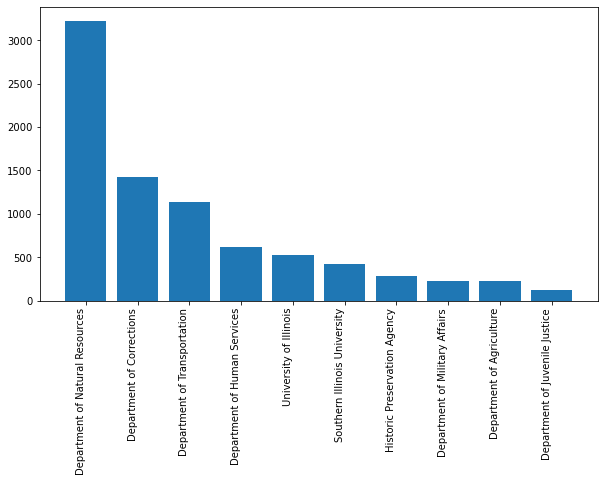

In [86]:
fig, ax = plt.subplots(figsize=(10,6))

names = []
counts = []

for agency, num in agency_counter.most_common(10):
    names.append(agency)
    counts.append(num)

ax.bar(names, counts)
fig.autofmt_xdate(rotation=90)